<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_3_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,69.752849,55.892449,-0.002152,135.643146,135.645043,-0.001897
1,0.0,1.0,88.999590,39.362904,-0.005308,138.357186,138.361834,-0.004647
2,0.0,2.0,35.911003,43.633732,0.000668,89.545402,89.546117,-0.000715
3,0.0,3.0,46.836167,45.912852,-0.003876,102.745144,102.749911,-0.004768
4,0.0,4.0,24.975682,60.351804,0.000141,95.327627,95.328935,-0.001308
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,65.118759,69.367788,0.000778,144.487325,144.486145,0.001179
19996,999.0,16.0,87.238493,42.419472,0.002539,139.660503,139.657124,0.003380
19997,999.0,17.0,51.656605,34.183593,0.000199,95.840397,95.838506,0.001891
19998,999.0,18.0,79.085912,57.631333,-0.002894,146.714351,146.716725,-0.002375


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.752849  55.892449 -0.002152  135.643146  135.645043 -0.001897
      1.0    88.999590  39.362904 -0.005308  138.357186  138.361834 -0.004647
      2.0    35.911003  43.633732  0.000668   89.545402   89.546117 -0.000715
      3.0    46.836167  45.912852 -0.003876  102.745144  102.749911 -0.004768
      4.0    24.975682  60.351804  0.000141   95.327627   95.328935 -0.001308
...                ...        ...       ...         ...         ...       ...
999.0 15.0   65.118759  69.367788  0.000778  144.487325  144.486145  0.001179
      16.0   87.238493  42.419472  0.002539  139.660503  139.657124  0.003380
      17.0   51.656605  34.183593  0.000199   95.840397   95.838506  0.001891
      18.0   79.085912  57.631333 -0.002894  146.714351  146.716725 -0.002375
      19.0   24.360781  38.512206  0.000195   72.873182   72.870963  0.002218

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.752849  55.892449 -0.002152  135.643146  135.645043 -0.001897
      1.0    88.999590  39.362904 -0.005308  138.357186  138.361834 -0.004647
      2.0    35.911003  43.633732  0.000668   89.545402   89.546117 -0.000715
      3.0    46.836167  45.912852 -0.003876  102.745144  102.749911 -0.004768
      4.0    24.975682  60.351804  0.000141   95.327627   95.328935 -0.001308
...                ...        ...       ...         ...         ...       ...
999.0 15.0   65.118759  69.367788  0.000778  144.487325  144.486145  0.001179
      16.0   87.238493  42.419472  0.002539  139.660503  139.657124  0.003380
      17.0   51.656605  34.183593  0.000199   95.840397   95.838506  0.001891
      18.0   79.085912  57.631333 -0.002894  146.714351  146.716725 -0.002375
      19.0   24.360781  38.512206  0.000195   72.873182   72.870963  0.002218

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,69.752849,55.892449,-0.002152,135.643146,135.645043,-0.001897
1,0.0,1.0,88.999590,39.362904,-0.005308,138.357186,138.361834,-0.004647
2,0.0,2.0,35.911003,43.633732,0.000668,89.545402,89.546117,-0.000715
3,0.0,3.0,46.836167,45.912852,-0.003876,102.745144,102.749911,-0.004768
4,0.0,4.0,24.975682,60.351804,0.000141,95.327627,95.328935,-0.001308
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,65.118759,69.367788,0.000778,144.487325,144.486145,0.001179
19996,999.0,16.0,87.238493,42.419472,0.002539,139.660503,139.657124,0.003380
19997,999.0,17.0,51.656605,34.183593,0.000199,95.840397,95.838506,0.001891
19998,999.0,18.0,79.085912,57.631333,-0.002894,146.714351,146.716725,-0.002375


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    69.752849  55.892449 -0.002152  135.643146  135.645043 -0.001897
      1.0    88.999590  39.362904 -0.005308  138.357186  138.361834 -0.004647
      2.0    35.911003  43.633732  0.000668   89.545402   89.546117 -0.000715
      3.0    46.836167  45.912852 -0.003876  102.745144  102.749911 -0.004768
      4.0    24.975682  60.351804  0.000141   95.327627   95.328935 -0.001308
...                ...        ...       ...         ...         ...       ...
999.0 15.0   65.118759  69.367788  0.000778  144.487325  144.486145  0.001179
      16.0   87.238493  42.419472  0.002539  139.660503  139.657124  0.003380
      17.0   51.656605  34.183593  0.000199   95.840397   95.838506  0.001891
      18.0   79.085912  57.631333 -0.002894  146.714351  146.716725 -0.002375
      19.0   24.360781  38.512206  0.000195   72.873182   72.870963  0.002218

[20000 rows x 6 columns]

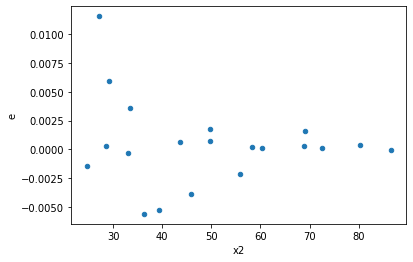

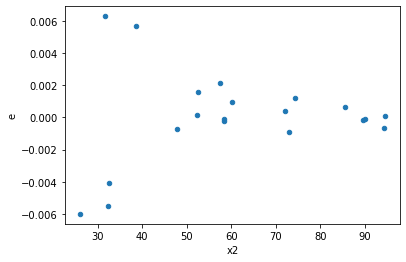

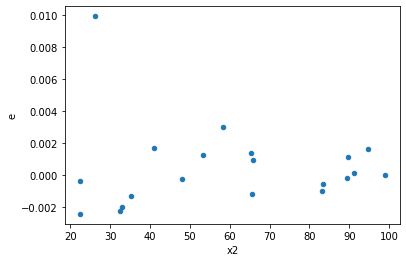

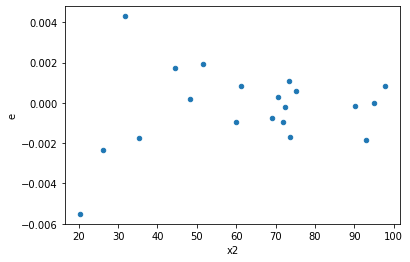

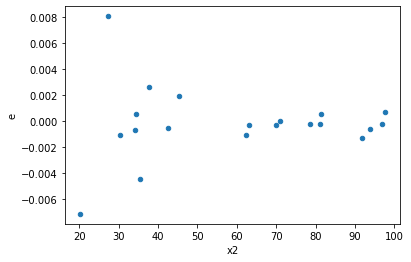

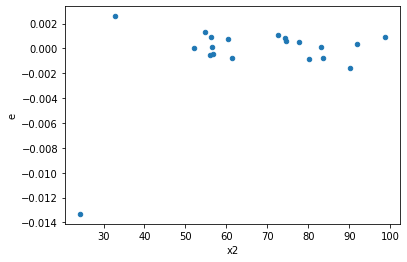

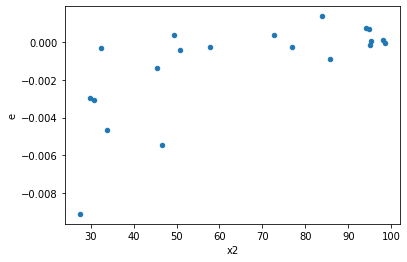

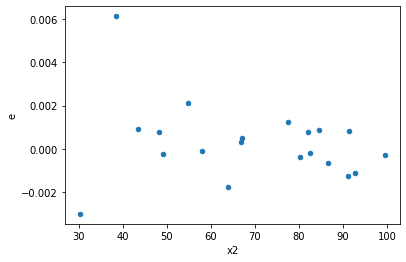

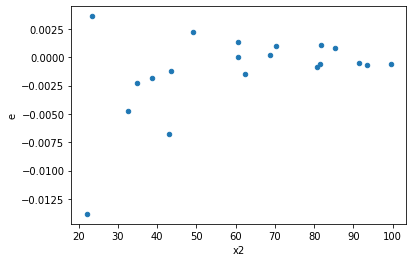

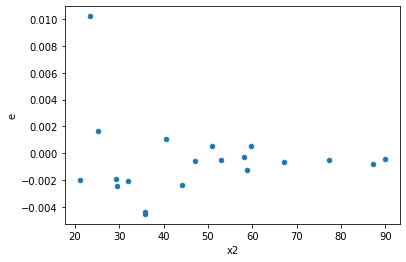

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,7.0,9.0,4.838515413356727e-05,0.00012591346165808552,6.912164876223896e-06,1.399038462867617e-05,2.024023569923739,0.32057197231392,0.83971401384304,0.16028598615696,Reject005=1 : Homoscedasticity
3.0,10.0,6.0,2.654402715500868e-05,2.8503065658550508e-05,2.6544027155008677e-06,4.7505109430917515e-06,1.789672273672069,0.49167599820544905,0.7541620008972755,0.24583799910272452,Reject005=1 : Homoscedasticity
4.0,6.0,10.0,2.7081802676480372e-06,0.00012797987453538046,4.5136337794133954e-07,1.2797987453538047e-05,28.35406698680217,2.014984858389468e-05,0.999989925075708,1.007492429194734e-05,Reject005=0 : Heteroscedasticity
5.0,11.0,5.0,7.6078121490003745e-06,4.261512123372897e-05,6.916192862727613e-07,8.523024246745795e-06,12.323288861242773,0.012323542561011758,0.9938382287194941,0.006161771280505879,Reject005=0 : Heteroscedasticity
8.0,11.0,5.0,3.8678892185544185e-05,9.861109128777058e-05,3.5162629259585624e-06,1.9722218257554115e-05,5.608857663047957,0.06976029193283284,0.9651198540335836,0.03488014596641642,Reject005=1 : Homoscedasticity
11.0,12.0,4.0,1.7128355835822575e-05,1.2566531793434746e-05,1.427362986318548e-06,3.1416329483586865e-06,2.201004914987729,0.4646127219792351,0.7676936390103825,0.23230636098961754,Reject005=1 : Homoscedasticity
13.0,7.0,9.0,1.2486140440125502e-05,2.4110869019693226e-05,1.7837343485893575e-06,2.6789854466325808e-06,1.5018971007376858,0.5578574172544442,0.7210712913727779,0.2789287086272221,Reject005=1 : Homoscedasticity
16.0,5.0,11.0,7.702516660514005e-06,0.00012795763348195273,1.5405033321028011e-06,1.1632512134722976e-05,7.551111310382231,0.005325363023744201,0.9973373184881279,0.0026626815118721003,Reject005=0 : Heteroscedasticity
18.0,7.0,9.0,5.341189201781774e-06,0.0001582924551500241,7.630270288259677e-07,1.75880505722249e-05,23.050363758786858,9.292455491149987e-05,0.9999535377225443,4.6462277455749934e-05,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,9.0,4.838515413356727e-05,0.00012591346165808552,6.912164876223896e-06,1.399038462867617e-05,2.024023569923739,0.32057197231392,Reject005=1 : Homoscedasticity
1.0,11.0,5.0,7.359716613507722e-05,1.7694601606725696e-05,6.690651466825202e-06,3.5389203213451393e-06,0.5289350878449511,0.35179533091580445,Reject005=1 : Homoscedasticity
2.0,10.0,6.0,4.7926797795532445e-05,8.097182241678737e-06,4.792679779553244e-06,1.3495303736131228e-06,0.2815815860201119,0.07547051729614947,Reject005=1 : Homoscedasticity
3.0,10.0,6.0,2.654402715500868e-05,2.8503065658550508e-05,2.6544027155008677e-06,4.7505109430917515e-06,1.789672273672069,0.49167599820544905,Reject005=1 : Homoscedasticity
4.0,6.0,10.0,2.7081802676480372e-06,0.00012797987453538046,4.5136337794133954e-07,1.2797987453538047e-05,28.35406698680217,2.014984858389468e-05,Reject005=0 : Heteroscedasticity
5.0,11.0,5.0,7.6078121490003745e-06,4.261512123372897e-05,6.916192862727613e-07,8.523024246745795e-06,12.323288861242773,0.012323542561011758,Reject005=0 : Heteroscedasticity
6.0,3.0,13.0,1.409673451206197e-05,9.15436430530512e-06,4.698911504020657e-06,7.041818696388554e-07,0.1498606366679426,0.14414223365861592,Reject005=1 : Homoscedasticity
7.0,8.0,8.0,2.8504216192589435e-05,3.200253708983977e-06,3.5630270240736794e-06,4.000317136229971e-07,0.1122729945409263,0.005650318938401357,Reject005=0 : Heteroscedasticity
8.0,11.0,5.0,3.8678892185544185e-05,9.861109128777058e-05,3.5162629259585624e-06,1.9722218257554115e-05,5.608857663047957,0.06976029193283284,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    567
Reject005=1 : Homoscedasticity      433
Name: Result_test, dtype: int64